<a href="https://colab.research.google.com/github/wuba2010work/CWP/blob/main/Moc3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rioxarray --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 44.5 MB/s eta 0:00:00


In [3]:
import os
import glob
import datetime
import xarray as xr
import rioxarray as rio
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [4]:
#To upload file.
uploaded = files.upload()

Saving Wad_Helal.zip to Wad_Helal.zip


In [5]:
# unzip the uploaded zipfile
!unzip '/content/Wad_Helal.zip' -d '/content/'

Archive:  /content/Wad_Helal.zip
   creating: /content/content/output/
   creating: /content/content/output/L3-AETI-D/
  inflating: /content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2023-02-21.tif  
  inflating: /content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2023-02-11.tif  
  inflating: /content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-12-21.tif  
  inflating: /content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2023-04-21.tif  
  inflating: /content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-11-21.tif  
  inflating: /content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2023-03-21.tif  
  inflating: /content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-11.tif  
  inflating: /content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-01.tif  
  inflati

In [6]:
# Open first raster from your unzipped files and mask out nan values
ds = rio.open_rasterio('/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-01.tif')
ds = ds.where(ds!=ds.attrs['_FillValue'])

In [7]:
# Inspect the contents - How many pixels does the raster contain?
ds


<xarray.DataArray (band: 1, y: 460, x: 754)> Size: 3MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 6kB 5.16e+05 5.16e+05 ... 5.31e+05 5.31e+05
  * y            (y) float64 4kB 1.586e+06 1.586e+06 ... 1.577e+06 1.577e+06
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:            Area
    end_date:                 2022-10-10
    long_name:                2022-10-01
    number_of_days:           10
    original_units:           mm/day
    overview:                 NONE
    ...                       ...
    temporal_resolution:      Dekad
    units:                    mm/dekad
    units_conversion_factor:  10
    _FillValue:               -9999.0
    scale_factor:             1.0
    add_offset:               0.0

In [8]:
#The values contained are stored as an array with each value representing one pixel.
ds.values

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])

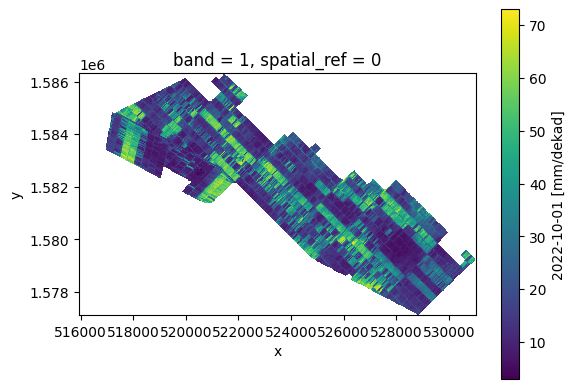

In [9]:
# We can produce a quick map of our data using the plot function
ds[0].plot()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box') #this command will equally space the x and y units

In [10]:
#check the min, max and mean values
print(np.nanmin(ds.values), np.nanmax(ds.values), np.nanmean(ds.values))

3.0 73.0 24.01129022520075


In [11]:
glob.glob('/content/content/output/L3-AETI-D/*.tif')

['/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2023-02-21.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2023-02-11.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-12-21.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2023-04-21.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-11-21.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2023-03-21.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-11.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-01.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2023-02-01.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2023-01-11.tif',
 '/content/content/o

In [12]:
glob.glob('/content/content/output/L3-AETI-D/*2022-10*.tif')

['/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-11.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-01.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-21.tif']

In [13]:
# Example to get files from October 2022
glob.glob('/content/content/output/L3-AETI-D/*2022-10*.tif')

['/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-11.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-01.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-21.tif']

In [14]:
for i, fp in enumerate(glob.glob('/content/content/output/L3-AETI-D/*.tif')):
  fn = os.path.basename(fp)
  # OPEN DATA
  ds = rio.open_rasterio(fp)
  ds = ds.where(ds!=ds.attrs['_FillValue'])
  if i == 0:
    ds_sum = ds #Initialize sum if we are looking at the first raster
  else:
    ds_sum += ds #This is the python way of writing ds_sum = ds_sum + ds

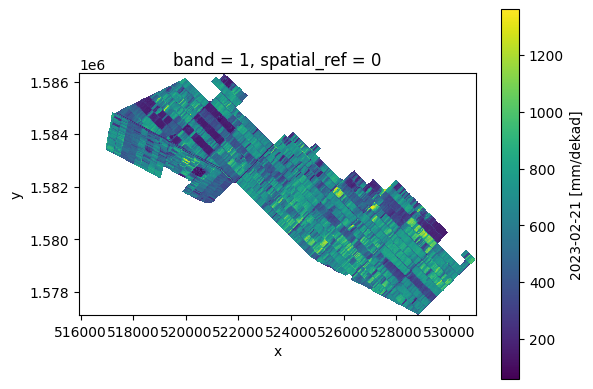

In [15]:
ds_sum.plot()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box') #this command will equally space the x and y units

In [16]:
#Inspect Attributes to see which ones we will update
attrs = ds_sum.attrs
attrs

{'AREA_OR_POINT': 'Area',
 'end_date': '2023-02-28',
 'long_name': '2023-02-21',
 'number_of_days': 8,
 'original_units': 'mm/day',
 'overview': 'NONE',
 'start_date': '2023-02-21',
 'temporal_resolution': 'Dekad',
 'units': 'mm/dekad',
 'units_conversion_factor': 8,
 '_FillValue': np.float64(-9999.0),
 'scale_factor': 1.0,
 'add_offset': 0.0}

In [17]:
attrs.update({'start_date': '2022-10-01',
              'end_date': '2023-04-30',
              'units' : 'mm/season'})
del attrs['number_of_days']

ds_sum.attrs  = attrs

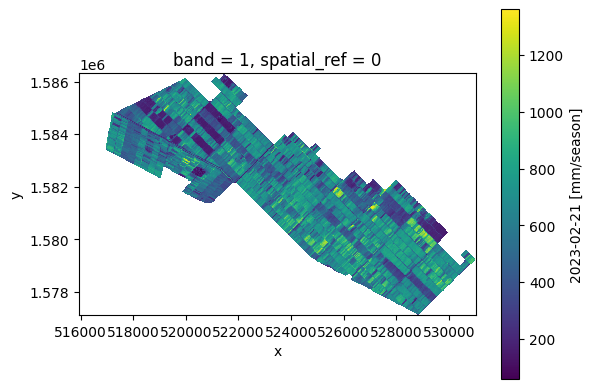

In [18]:
ds_sum.plot()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box') #this command will equally space the x and y units

In [19]:
# Save the seasonal sum to a TIFF file and download to your local drive
ds_sum.rio.to_raster("Wad_Helal_seasonal_AETI.tif")
files.download(r'/content/Wad_Helal_seasonal_AETI.tif')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>